Introduction: The Graduate's Dilemma

As a new graduate preparing to enter the tech industry, you face a critical question: "What should I learn?" The landscape is confusing. Should you follow the "hype" and learn the new, exciting technologies your peers and online influencers are talking about? Should you follow the "demand" and learn the skills that appear in the most job postings? Or should you simply follow the "dollars" and learn whatever pays the most?

This analysis uses data from Stack Overflow (what developers want and earn) and real-world job postings (what employers are hiring for and offering) to build a "Career Compass." Our goal is to find the "sweet spot" for a new graduate: skills that are high in hype, high in demand, and lead to high-paying, future-proof careers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import defaultdict

# --- Configuration & Styling ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# --- File Paths (Update if files are in a different directory) ---
FILE_2019 = 'major_cleaned_2019_survey.csv'
FILE_2024 = 'major_cleaned_2024_survey.csv'
FILE_JOBS = 'AGENT_job_analysis_results.csv'


In [2]:
def load_data():
    """Loads all three CSV files."""
    try:
        df_2019 = pd.read_csv(FILE_2019)
        df_2024 = pd.read_csv(FILE_2024)
        df_jobs = pd.read_csv(FILE_JOBS)
        print("All files loaded successfully.")
        return df_2019, df_2024, df_jobs
    except FileNotFoundError as e:
        print(f"Error loading file: {e}")
        print("Please make sure all CSV files are in the same directory as this script.")
        return None, None, None

def get_skill_counts(series, delimiter=';'):
    """
    Splits a series by a delimiter, normalizes, and returns value counts.
    """
    # Drop NaNs and filter out non-string entries just in case
    series = series.dropna().astype(str)
    
    # Split, stack, and strip whitespace
    skills = series.str.split(delimiter).explode().str.strip()
    
    # Normalize common skills
    skill_normalization_map = {
        'bash/shell (all shells)': 'bash/shell',
        'bash/shell/powershell': 'bash/shell',
        'html/css': 'html/css',
        'html 5': 'html/css',
        'c#': 'c#',
        'c++': 'c++',
        'node.js': 'nodejs',
        'react.js': 'react',
        'angular/angular.js': 'angular',
        'ms-sql': 'mssql',
        'microsoft sql server': 'mssql',
        'mysql': 'mysql',
        'postgresql': 'postgresql',
        'postgres': 'postgresql',
        'mongodb': 'mongodb',
        'amazon web services (aws)': 'aws',
        'ms azure': 'azure',
        'microsoft azure': 'azure',
        'google cloud platform': 'gcp',
        'google cloud': 'gcp',
        'ai': 'ai/ml',
        'machine learning': 'ai/ml',
        'deep-learning frameworks': 'ai/ml',
        'tensorflow': 'tensorflow',
        'pytorch': 'pytorch',
        '.net': '.net',
        '.net core': '.net',
        '.net (5+)': '.net'
    }
    
    skills = skills.str.lower().map(lambda x: skill_normalization_map.get(x, x))
    
    # Return as a percentage
    return (skills.value_counts(normalize=True) * 100).rename('Percentage')

def clean_ctc_column(ctc_series):
    """
    Converts 'X.Y LPA' or 'X LPA' string to a numeric value.
    """
    if ctc_series.dtype == 'object':
        # Extract numbers, handling formats like '6.6 LPA' or '10 LPA'
        ctc_numeric = ctc_series.str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
        # Convert LPA (Lakhs Per Annum) to numeric value
        ctc_numeric = ctc_numeric * 100000
        return ctc_numeric
    return pd.to_numeric(ctc_series, errors='coerce')

In [3]:
# --- Question 1: The "Hype" ---
def analyze_hype(df_2019, df_2024):
    """
    Analyzes and plots the change in "desired" languages from 2019 to 2024.
    """
    print("\n--- Analyzing Question 1: Developer 'Hype' (2019 vs 2024) ---")
    
    # Get skill counts for "desire" columns
    hype_2019 = get_skill_counts(df_2019['LanguageDesireNextYear'], delimiter=';')
    hype_2024 = get_skill_counts(df_2024['LanguageWantToWorkWith'], delimiter=';')
    
    # Combine into a single DataFrame
    hype_df = pd.DataFrame({'2019': hype_2019, '2024': hype_2024}).fillna(0)
    
    # Get top 15 based on 2024 hype
    top_hype_2024 = hype_df.nlargest(15, '2024').sort_values('2024', ascending=False)
    
    # Prepare for plotting
    plot_df = top_hype_2024.reset_index().melt(id_vars='index', var_name='Year', value_name='Percentage')
    plot_df.rename(columns={'index': 'Language'}, inplace=True)

    # Plot
    plt.figure(figsize=(15, 8))
    sns.barplot(data=plot_df, x='Language', y='Percentage', hue='Year', palette={'2019': 'lightgray', '2024': 'cornflowerblue'})
    plt.title('Question 1: Developer "Hype" - Top 15 Desired Languages (2019 vs. 2024)', fontsize=16, fontweight='bold')
    plt.ylabel('% of Developers Who Want to Work With It')
    plt.xlabel('Programming Language')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return hype_df

In [7]:
df_2019, df_2024, df_jobs = load_data()

All files loaded successfully.



--- Analyzing Question 1: Developer 'Hype' (2019 vs 2024) ---


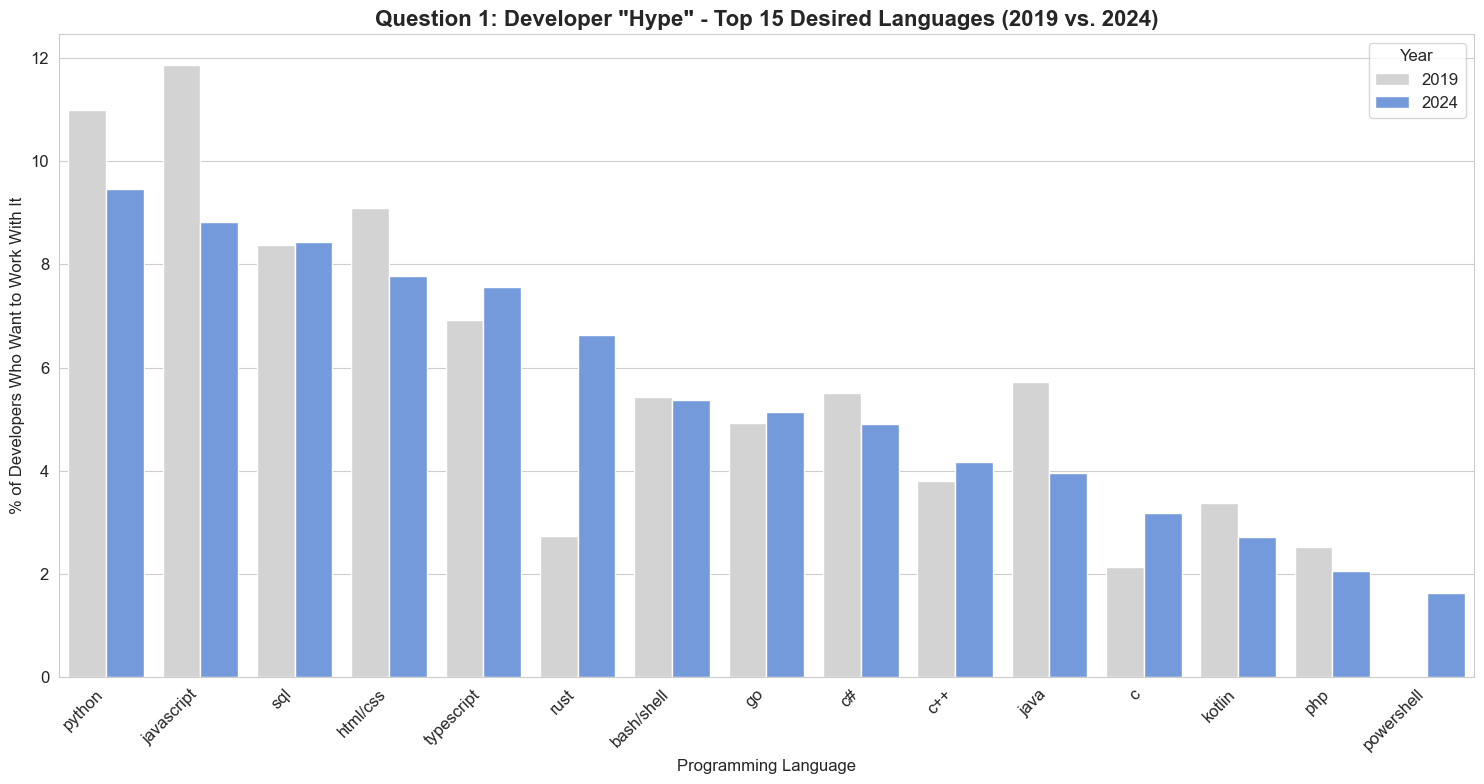

In [5]:
hype_df = analyze_hype(df_2019, df_2024)

Question 1: The "Aspiration Gap" - What Do Developers Have vs. Want?

Instead of just looking at hype over time, a more powerful story emerges when we compare what developers currently use (LanguageHaveWorkedWith) with what they want to learn (LanguageWantToWorkWith) in 2024. This "Aspiration Gap" shows us which skills are "workhorses" (people use them more than they want them) and which are "aspirational" (people want to learn them).

Narrative & Insights:

Highly Aspirational (Want > Have): This chart clearly shows that Rust and Go are the most aspirational languages. A high percentage of developers want to learn them, far exceeding the percentage that currently use them professionally. This signals high developer passion and a potential future talent pool.

The 'Workhorses' (Have > Want): On the other side, technologies like SQL, HTML/CSS, and JavaScript have a large negative gap. This doesn't mean they are "bad"; it means they are foundational. More people use them as part of their daily job than desire to learn them as a new, exciting skill. They are the essential, ubiquitous tools of the trade.

The Beloved Staples (Want ≈ Have): Python and TypeScript (which appears in the "Aspirational" side) are in a healthy position. A large number of people use them, and a similarly large (or larger) number of people want to work with them. They are both in-demand workhorses and remain "hyped" and desirable.

The "Hype" Takeaway: The 2024 developer mindset is clear: they are seeking modern, performant languages (Rust, Go) while being supported by a necessary foundation of established, universal "workhorse" skills (SQL, JavaScript, HTML/CSS).

In [6]:
# --- Question 1: The "Aspiration Gap" (Have vs. Want) ---
def analyze_hype(df_2019, df_2024):
    """
    Analyzes and plots the "Aspiration Gap" between languages developers
    'Have Worked With' and 'Want To Work With' in 2024.
    """
    print("\n--- Analyzing Question 1: Developer 'Aspiration Gap' (2024) ---")
    
    # Get skill counts for "Have" and "Want" columns from 2024
    have_2024 = get_skill_counts(df_2024['LanguageHaveWorkedWith'], delimiter=';')
    want_2024 = get_skill_counts(df_2024['LanguageWantToWorkWith'], delimiter=';')
    
    # Combine into a single DataFrame
    hype_df = pd.DataFrame({'Have': have_2024, 'Want': want_2024}).fillna(0)
    
    # Calculate the "Aspiration Gap" (Want - Have)
    hype_df['Gap'] = hype_df['Want'] - hype_df['Have']
    
    # Get top 10 most "Aspirational" (largest positive gap)
    top_aspirational = hype_df.nlargest(10, 'Gap')
    
    # Get top 10 "Workhorses" (largest negative gap)
    top_workhorse = hype_df.nsmallest(10, 'Gap')
    
    # Combine for plotting
    plot_df = pd.concat([top_aspirational, top_workhorse]).sort_values('Gap', ascending=False)
    plot_df = plot_df.reset_index().rename(columns={'index': 'Language'})

    # Create a color palette for diverging chart
    palette = ['cornflowerblue' if x > 0 else 'lightgray' for x in plot_df['Gap']]

    # Plot
    plt.figure(figsize=(15, 10))
    sns.barplot(data=plot_df, x='Gap', y='Language', palette=palette)
    plt.title('Question 1: The "Aspiration Gap" - What Developers Have vs. Want (2024)', fontsize=16, fontweight='bold')
    plt.xlabel('% Point Gap (Want % - Have %)')
    plt.ylabel('Programming Language')
    
    # Add labels
    plt.axvline(0, color='black', lw=0.5)
    plt.text(plot_df['Gap'].max() * 0.5, 9.5, 'More Aspirational\n(Want > Have)', 
             ha='center', fontsize=12, color='cornflowerblue', weight='bold')
    plt.text(plot_df['Gap'].min() * 0.5, 10.5, 'More "Workhorse"\n(Have > Want)', 
             ha='center', fontsize=12, color='dimgray', weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Rename 'Want' to '2024' for compatibility with Question 4
    return hype_df.rename(columns={'Want': '2024'})



--- Analyzing Question 1: Developer 'Aspiration Gap' (2024) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\2453998822.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Gap', y='Language', palette=palette)


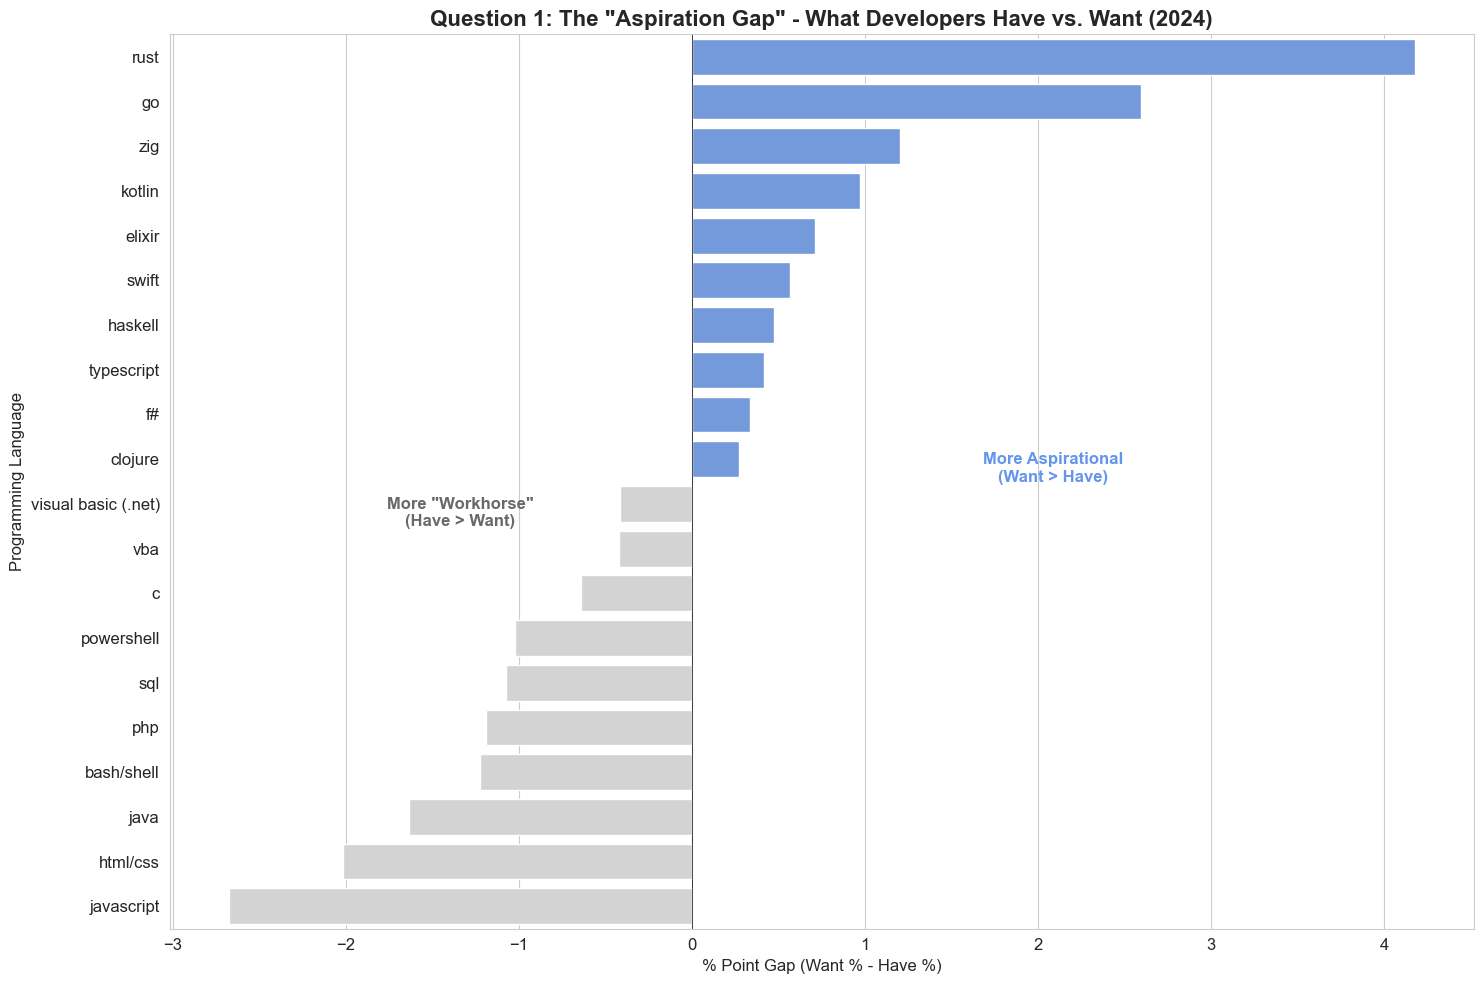

In [8]:
hype_df = analyze_hype(df_2019, df_2024)

In [10]:
# --- Question 1b: The "Evolution of Hype" (2019 vs 2024) ---
def analyze_desire_change(df_2019, df_2024):
    """
    Analyzes and plots the change in "desire" for languages
    from 2019 to 2024.
    """
    print("\n--- Analyzing Question 1b: Evolution of Hype (2019 vs 2024) ---")
    
    # Get skill counts for "desire" columns
    desire_2019 = get_skill_counts(df_2019['LanguageDesireNextYear'], delimiter=';')
    desire_2024 = get_skill_counts(df_2024['LanguageWantToWorkWith'], delimiter=';')
    
    # Combine into a single DataFrame
    desire_df = pd.DataFrame({'2019': desire_2019, '2024': desire_2024}).fillna(0)
    
    # Calculate the percentage point change
    desire_df['Change_in_Desire'] = desire_df['2024'] - desire_df['2019']
    
    # Get top 10 biggest "Grew"
    top_grew = desire_df.nlargest(10, 'Change_in_Desire')
    
    # Get top 10 biggest "Faded"
    top_faded = desire_df.nsmallest(10, 'Change_in_Desire')
    
    # Combine for plotting
    plot_df = pd.concat([top_grew, top_faded]).sort_values('Change_in_Desire', ascending=False)
    plot_df = plot_df.reset_index().rename(columns={'index': 'Language'})

    # Create a color palette for diverging chart
    palette = ['mediumseagreen' if x > 0 else 'salmon' for x in plot_df['Change_in_Desire']]

    # Plot
    plt.figure(figsize=(15, 10))
    sns.barplot(data=plot_df, x='Change_in_Desire', y='Language', palette=palette)
    plt.title('Question 1b: The "Evolution of Hype" - Change in Developer Desire (2019 vs. 2024)', fontsize=16, fontweight='bold')
    plt.xlabel('Percentage Point Change in "Desire" (2024 % - 2019 %)')
    plt.ylabel('Programming Language')
    
    # Add labels
    plt.axvline(0, color='black', lw=0.5)
    plt.text(plot_df['Change_in_Desire'].max() * 0.5, 9.5, 'Grew in Hype\n(More Desired in 2024)', 
             ha='center', fontsize=12, color='mediumseagreen', weight='bold')
    plt.text(plot_df['Change_in_Desire'].min() * 0.5, 10.5, 'Faded in Hype\n(Less Desired in 2024)', 
             ha='center', fontsize=12, color='salmon', weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return desire_df


--- Analyzing Question 1b: Evolution of Hype (2019 vs 2024) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\2252013798.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Change_in_Desire', y='Language', palette=palette)


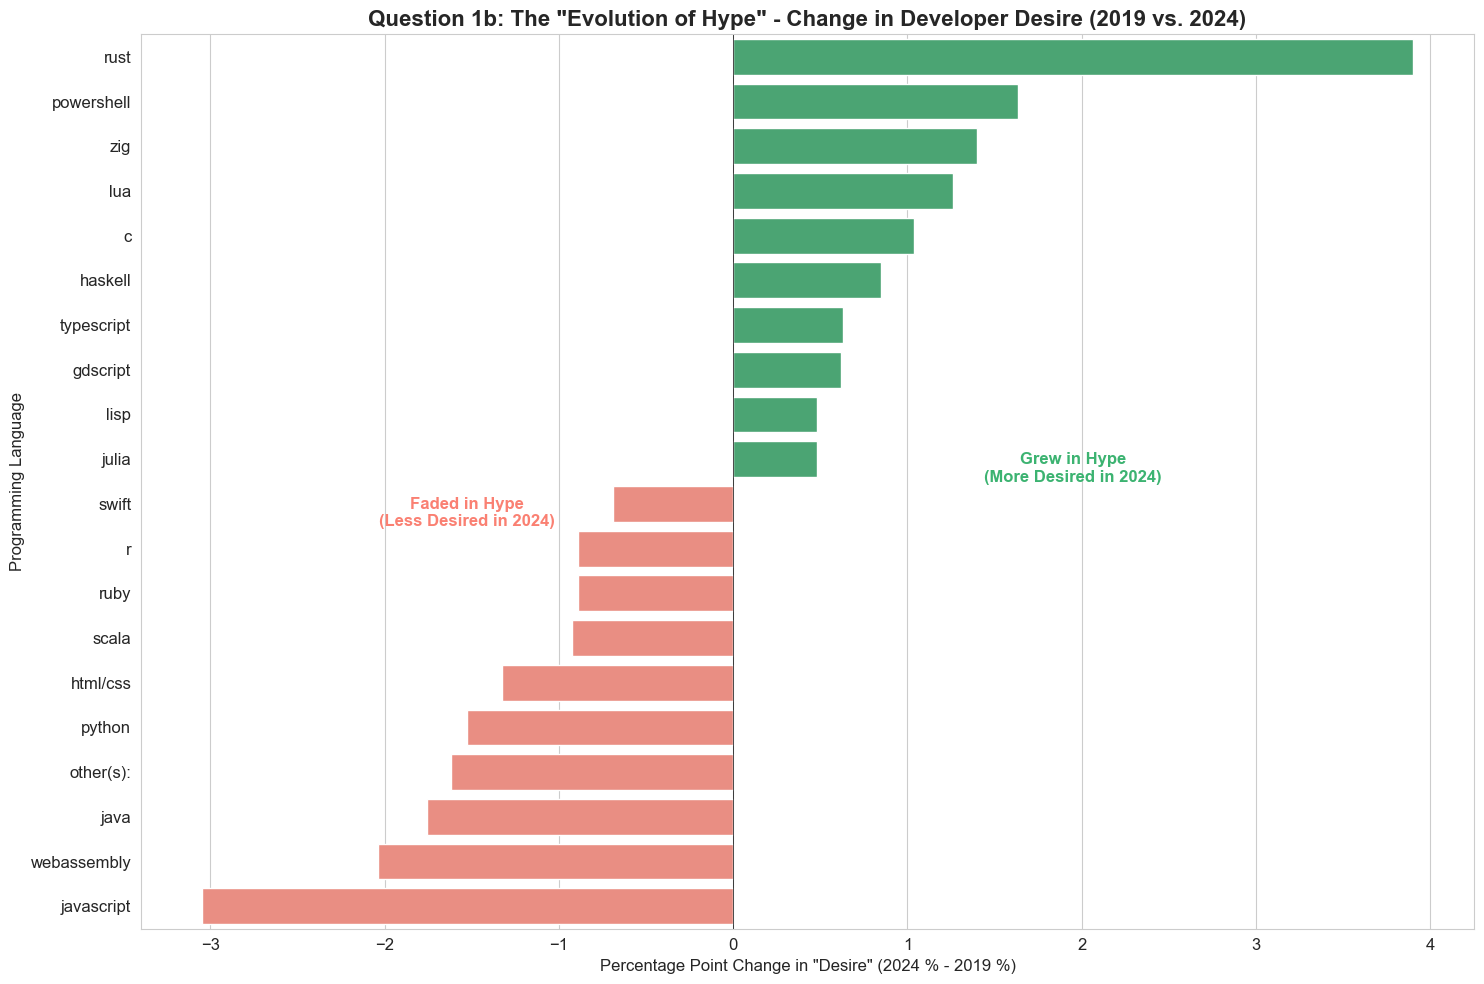

In [11]:
hype_df1 = analyze_desire_change(df_2019, df_2024)

Files loaded successfully.

--- Running Part 1: 2024 'Aspiration Gap' Analysis ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


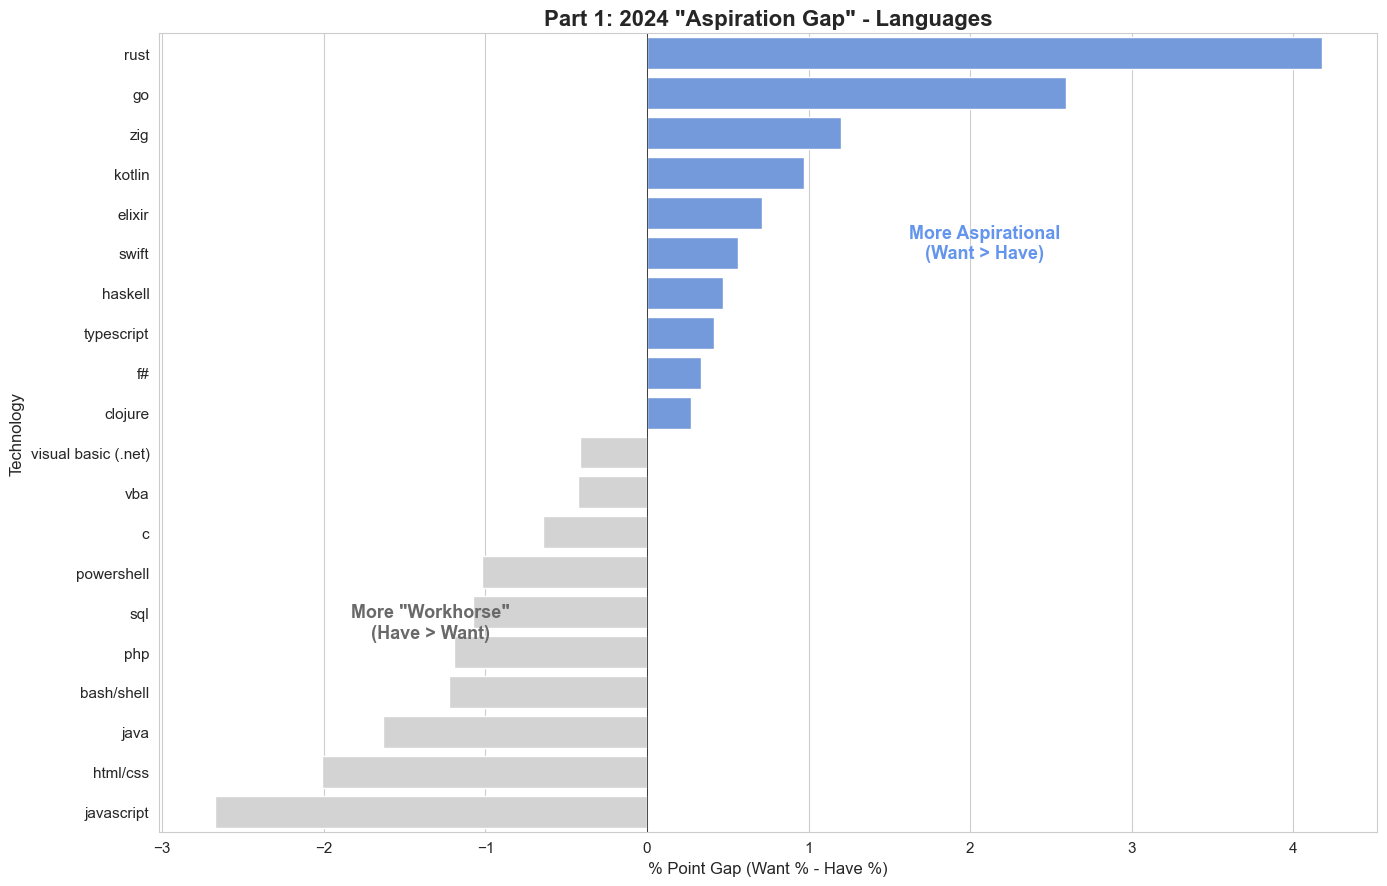

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


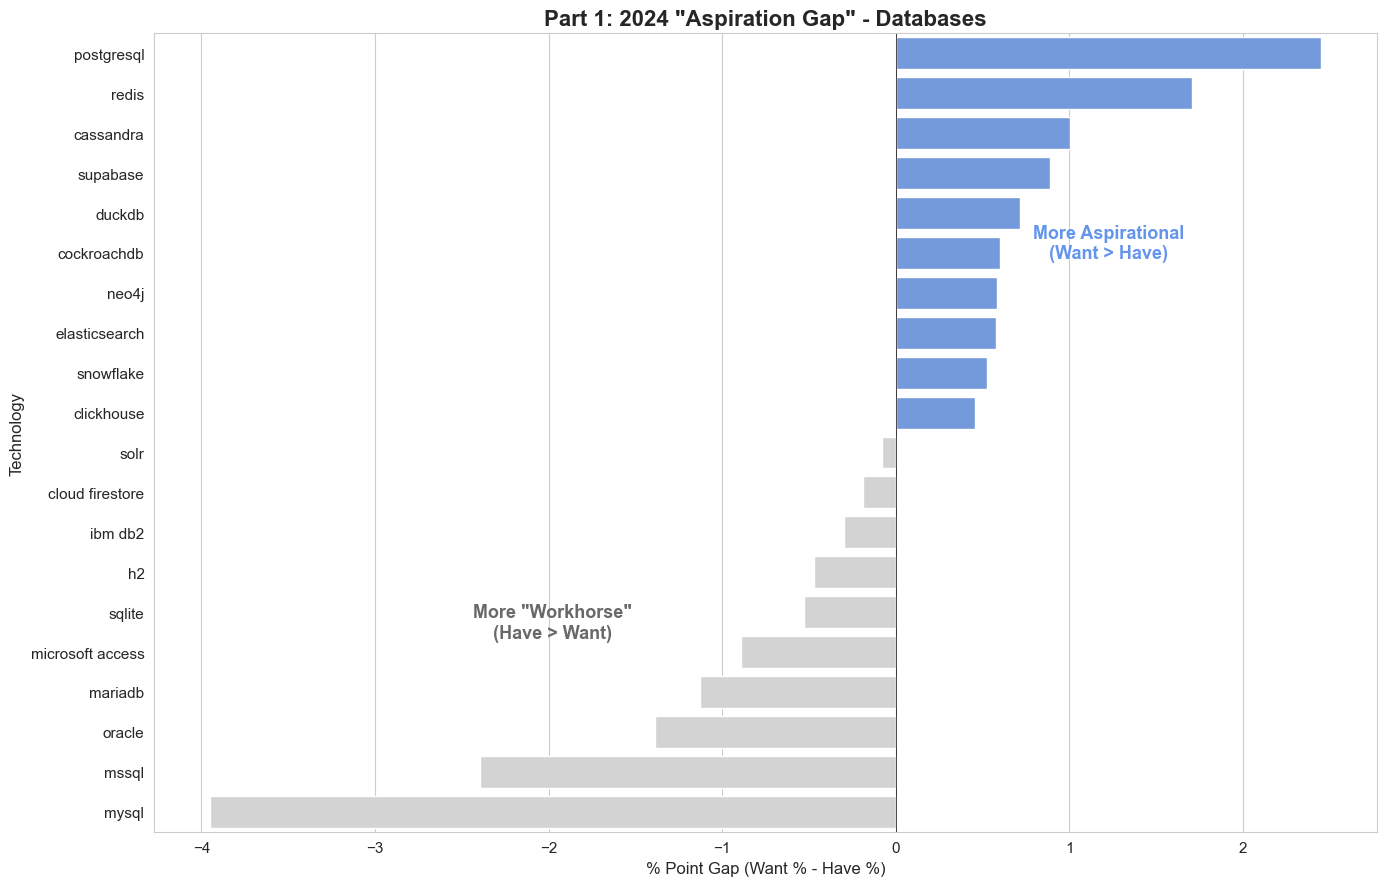

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


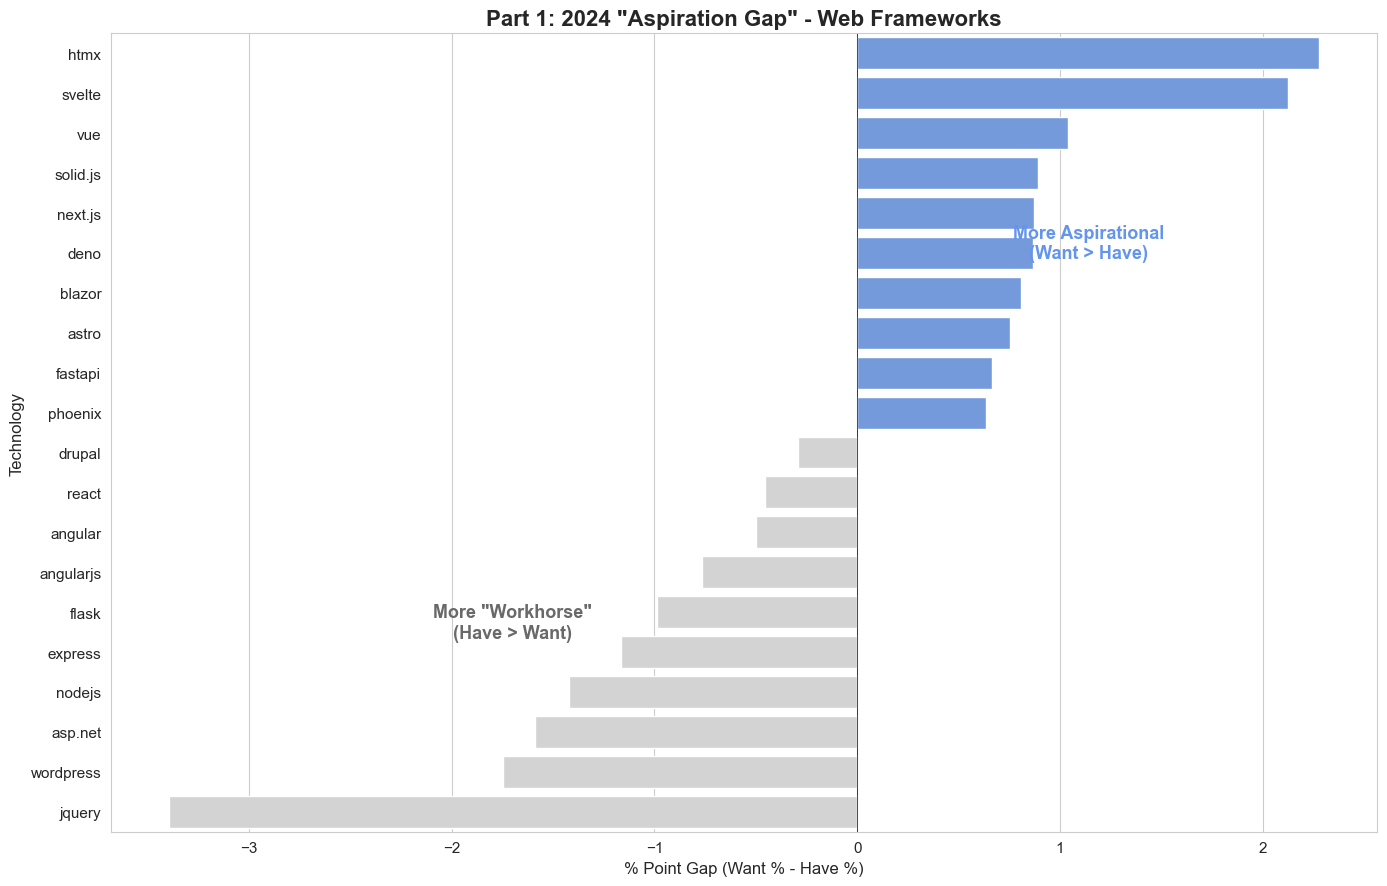


--- Running Part 2: 'Evolution of Hype' (2019 vs. 2024) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


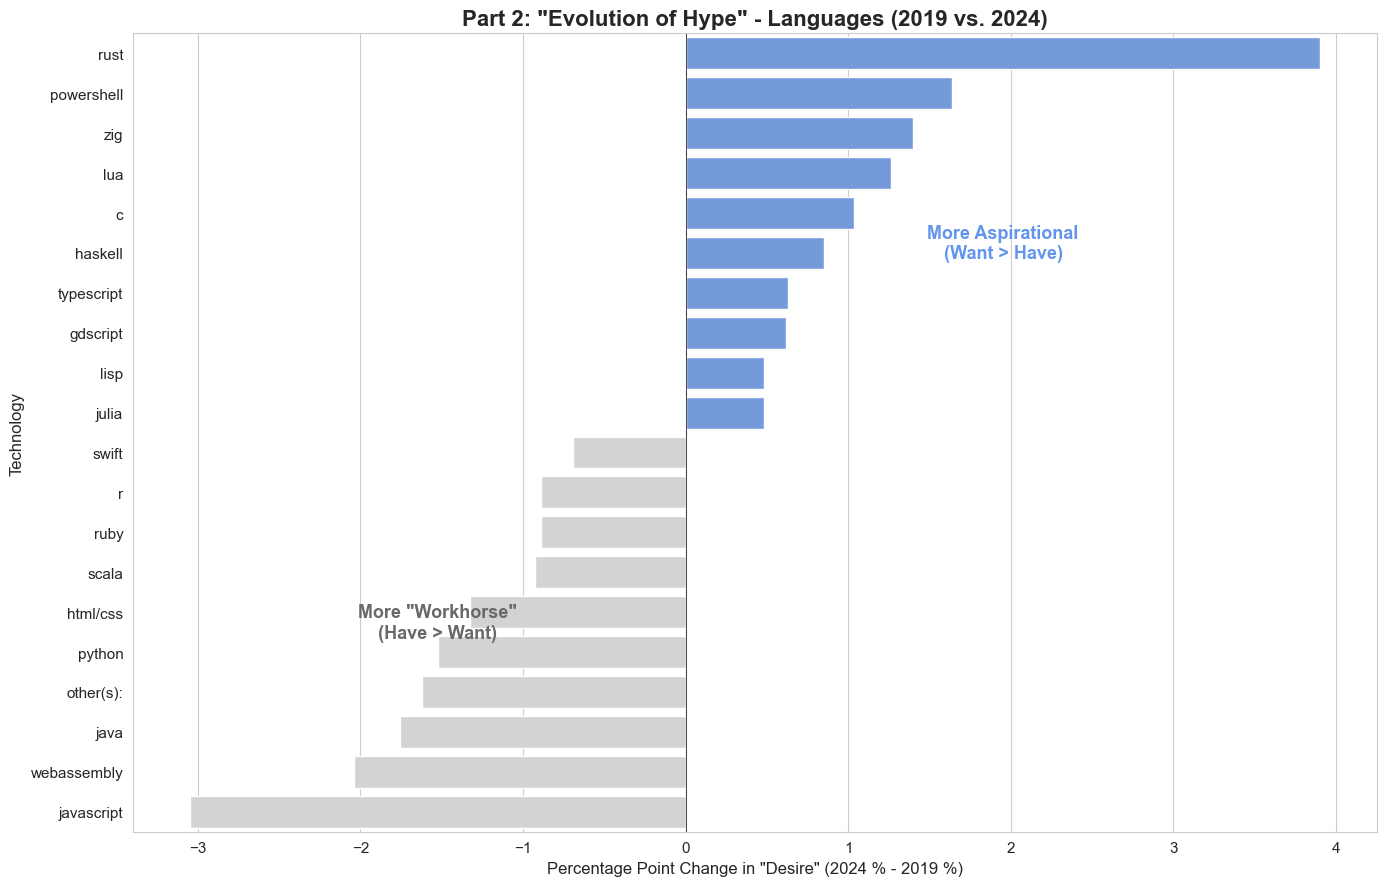

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


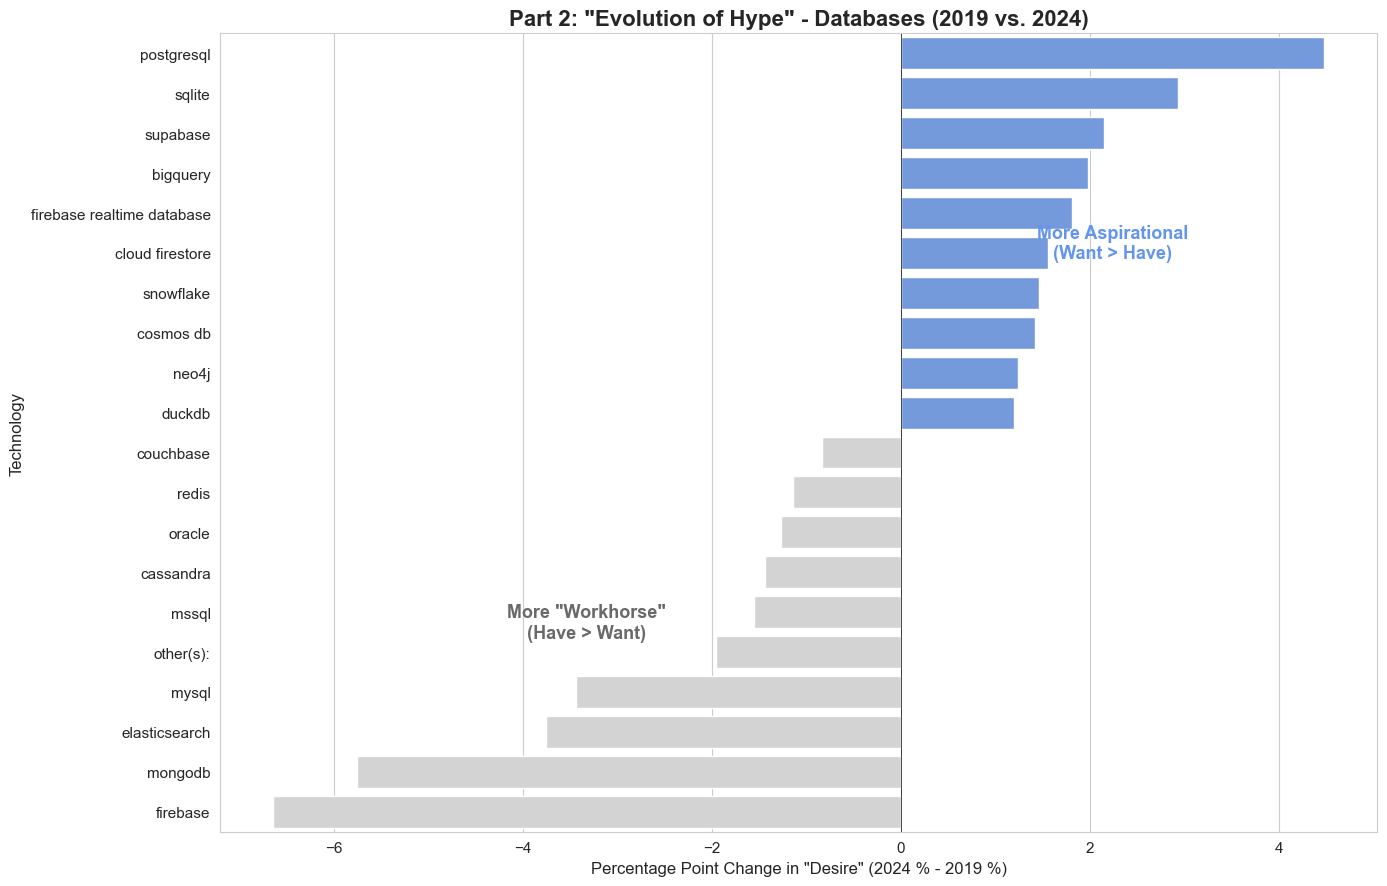

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\3359578530.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


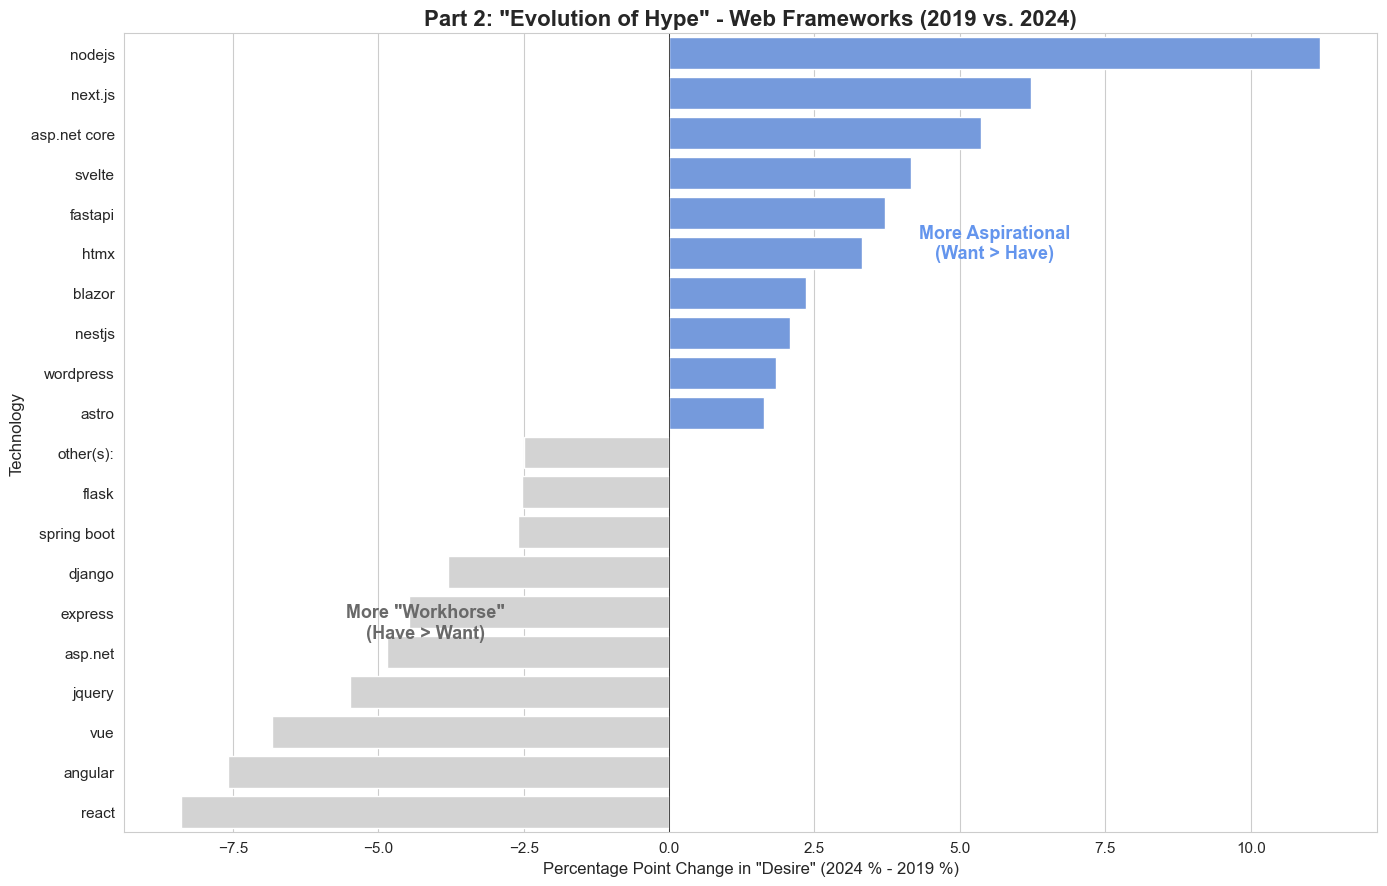

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration & Styling ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 11

# --- File Paths ---
FILE_2019 = 'major_cleaned_2019_survey.csv'
FILE_2024 = 'major_cleaned_2024_survey.csv'

# --- Main Helper Function ---

def get_skill_counts(series, delimiter=';'):
    """
    Splits a series by a delimiter, normalizes, and returns value counts.
    """
    if not isinstance(series, pd.Series):
        return pd.Series(dtype='float64').rename('Percentage')
        
    series = series.dropna().astype(str)
    skills = series.str.split(delimiter).explode().str.strip()
    
    # Comprehensive normalization map
    skill_normalization_map = {
        # Languages
        'bash/shell (all shells)': 'bash/shell',
        'bash/shell/powershell': 'bash/shell',
        'html/css': 'html/css',
        'html 5': 'html/css',
        'c#': 'c#',
        'c++': 'c++',
        'node.js': 'nodejs',  # Grouping Node.js
        'react.js': 'react',
        'angular/angular.js': 'angular',
        'vue.js': 'vue',
        
        # Databases
        'ms-sql': 'mssql',
        'microsoft sql server': 'mssql',
        'postgresql': 'postgresql',
        'postgres': 'postgresql',
        'mongodb': 'mongodb',
        'dynamodb': 'dynamodb',
        'redis': 'redis',
        'mysql': 'mysql',
        'sqlite': 'sqlite',

        # Web Frameworks
        'asp.net': 'asp.net',
        '.net': 'asp.net core', # Map .NET to ASP.NET Core for web context
        '.net core': 'asp.net core',
        '.net (5+)': 'asp.net core',
        'django': 'django',
        'flask': 'flask',
        'express': 'express',
        'fastapi': 'fastapi',
        'next.js': 'next.js',
        'spring boot': 'spring boot',
        'spring': 'spring boot', # Grouping Spring
    }
    
    skills = skills.str.lower().map(lambda x: skill_normalization_map.get(x, x))
    
    # Return as a percentage
    return (skills.value_counts(normalize=True) * 100).rename('Percentage')

def plot_diverging_bar(df, title, xlabel):
    """
    Helper function to create a standardized diverging bar chart.
    """
    df = df.sort_values('Gap', ascending=False)
    
    # Create a color palette for diverging chart
    palette = ['cornflowerblue' if x > 0 else 'lightgray' for x in df['Gap']]

    # Plot
    plt.figure(figsize=(14, 9))
    sns.barplot(data=df, x='Gap', y=df.index, palette=palette)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Technology', fontsize=12)
    
    # Add labels
    plt.axvline(0, color='black', lw=0.5)
    
    # Find positions for labels
    mid_point = (len(df) - 1) / 2
    top_label_y = mid_point * 0.5  # Position in the top half
    bottom_label_y = mid_point + (mid_point * 0.5) # Position in the bottom half
    
    if (df['Gap'] > 0).any():
        plt.text(df['Gap'].max() * 0.5, top_label_y, 'More Aspirational\n(Want > Have)', 
                 ha='center', va='center', fontsize=13, color='cornflowerblue', weight='bold')
    if (df['Gap'] < 0).any():
        plt.text(df['Gap'].min() * 0.5, bottom_label_y, 'More "Workhorse"\n(Have > Want)', 
                 ha='center', va='center', fontsize=13, color='dimgray', weight='bold')
    
    plt.tight_layout()
    plt.show()

# --- Part 1: The 2024 "Aspiration Gap" ---

def analyze_2024_gap(df_2024):
    """
    Analyzes and plots the "Aspiration Gap" for Languages, Databases,
    and Web Frameworks from the 2024 data.
    """
    print("\n--- Running Part 1: 2024 'Aspiration Gap' Analysis ---")
    
    # Define column pairs
    categories = {
        'Language': ('LanguageHaveWorkedWith', 'LanguageWantToWorkWith'),
        'Database': ('DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith'),
        'Web Framework': ('WebframeHaveWorkedWith', 'WebframeWantToWorkWith')
    }
    
    for tech_type, (have_col, want_col) in categories.items():
        # Get skill counts
        have_pct = get_skill_counts(df_2024[have_col], delimiter=';')
        want_pct = get_skill_counts(df_2024[want_col], delimiter=';')
        
        # Combine into a single DataFrame
        gap_df = pd.DataFrame({'Have': have_pct, 'Want': want_pct}).fillna(0)
        
        # Calculate the "Aspiration Gap" (Want - Have)
        gap_df['Gap'] = gap_df['Want'] - gap_df['Have']
        
        # Filter for top/bottom 10
        top_aspirational = gap_df.nlargest(10, 'Gap')
        top_workhorse = gap_df.nsmallest(10, 'Gap')
        
        # Combine for plotting
        plot_df = pd.concat([top_aspirational, top_workhorse])
        # Drop any zeros that might have crept in if < 20 skills
        plot_df = plot_df[plot_df['Gap'] != 0]
        
        # Plot
        plot_diverging_bar(
            plot_df,
            f'Part 1: 2024 "Aspiration Gap" - {tech_type}s',
            '% Point Gap (Want % - Have %)'
        )

# --- Part 2: The "Evolution of Hype" (2019 vs. 2024) ---

def analyze_hype_evolution(df_2019, df_2024):
    """
    Analyzes and plots the change in "Desire" for Languages, Databases,
    and Web Frameworks from 2019 to 2024.
    """
    print("\n--- Running Part 2: 'Evolution of Hype' (2019 vs. 2024) ---")
    
    # Define column pairs for 2019 (Desire) and 2024 (Want)
    categories = {
        'Language': ('LanguageDesireNextYear', 'LanguageWantToWorkWith'),
        'Database': ('DatabaseDesireNextYear', 'DatabaseWantToWorkWith'),
        'Web Framework': ('WebFrameDesireNextYear', 'WebframeWantToWorkWith')
    }
    
    for tech_type, (col_2019, col_2024) in categories.items():
        # Get skill counts
        desire_2019 = get_skill_counts(df_2019[col_2019], delimiter=';')
        desire_2024 = get_skill_counts(df_2024[col_2024], delimiter=';')
        
        # Combine into a single DataFrame
        desire_df = pd.DataFrame({'2019': desire_2019, '2024': desire_2024}).fillna(0)
        
        # Calculate the "Hype Change"
        desire_df['Gap'] = desire_df['2024'] - desire_df['2019']
        
        # Filter for top/bottom 10
        top_grew = desire_df.nlargest(10, 'Gap')
        top_faded = desire_df.nsmallest(10, 'Gap')
        
        # Combine for plotting
        plot_df = pd.concat([top_grew, top_faded])
        plot_df = plot_df[plot_df['Gap'] != 0]

        # Plot
        plot_diverging_bar(
            plot_df,
            f'Part 2: "Evolution of Hype" - {tech_type}s (2019 vs. 2024)',
            'Percentage Point Change in "Desire" (2024 % - 2019 %)'
        )

# --- Main Execution ---
def main():
    try:
        df_2019 = pd.read_csv(FILE_2019)
        df_2024 = pd.read_csv(FILE_2024)
        print("Files loaded successfully.")
    except FileNotFoundError:
        print(f"Error: Make sure {FILE_2019} and {FILE_2024} are in the same directory.")
        return

    # Run Part 1
    analyze_2024_gap(df_2024)
    
    # Run Part 2
    analyze_hype_evolution(df_2019, df_2024)

if __name__ == "__main__":
    main()

IDK second time

In [15]:
# Collect all relevant columns first
cols = [
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith'
]

# Flatten, clean, and get unique raw skills
raw_skills = (
    df_2024[cols]
    .melt(value_name='skills')            # convert wide -> long
    ['skills']
    .dropna()
    .astype(str)
    .str.lower()
    .str.split(';')
    .explode()
    .str.strip()
    .unique()
)

print(f"Unique raw skill entries: {len(raw_skills)}")
print(sorted(raw_skills)[:100])  # preview the first 100


Unique raw skill entries: 120
['ada', 'angular', 'angularjs', 'apex', 'asp.net', 'asp.net core', 'assembly', 'astro', 'bash/shell (all shells)', 'bigquery', 'blazor', 'c', 'c#', 'c++', 'cassandra', 'clickhouse', 'clojure', 'cloud firestore', 'cobol', 'cockroachdb', 'codeigniter', 'cosmos db', 'couch db', 'couchbase', 'crystal', 'dart', 'databricks sql', 'datomic', 'delphi', 'deno', 'django', 'drupal', 'duckdb', 'dynamodb', 'elasticsearch', 'elixir', 'elm', 'erlang', 'eventstoredb', 'express', 'f#', 'fastapi', 'fastify', 'firebase realtime database', 'firebird', 'flask', 'fortran', 'gatsby', 'gdscript', 'go', 'groovy', 'h2', 'haskell', 'html/css', 'htmx', 'ibm db2', 'influxdb', 'java', 'javascript', 'jquery', 'julia', 'kotlin', 'laravel', 'lisp', 'lua', 'mariadb', 'matlab', 'micropython', 'microsoft access', 'microsoft sql server', 'mongodb', 'mysql', 'neo4j', 'nestjs', 'next.js', 'nim', 'node.js', 'nuxt.js', 'objective-c', 'ocaml', 'oracle', 'perl', 'phoenix', 'php', 'play framework', 

In [16]:
skill_normalization_map = {
    'bash/shell (all shells)': 'bash/shell',
    'bash/shell/powershell': 'bash/shell',
    'html/css': 'html/css',
    'html 5': 'html/css',
    'c#': 'c#',
    'c++': 'c++',
    'node.js': 'nodejs',
    'react.js': 'react',
    'angular/angular.js': 'angular',
    'vue.js': 'vue',
    'ms-sql': 'mssql',
    'microsoft sql server': 'mssql',
    'postgresql': 'postgresql',
    'postgres': 'postgresql',
    'mongodb': 'mongodb',
    'dynamodb': 'dynamodb',
    'redis': 'redis',
    'mysql': 'mysql',
    'sqlite': 'sqlite',
    'asp.net': 'asp.net',
    '.net': 'asp.net core',
    '.net core': 'asp.net core',
    '.net (5+)': 'asp.net core',
    'django': 'django',
    'flask': 'flask',
    'express': 'express',
    'fastapi': 'fastapi',
    'next.js': 'next.js',
    'spring boot': 'spring boot',
    'spring': 'spring boot'
}

mapped = set(skill_normalization_map.keys())
raw = set(raw_skills)

covered = sorted(raw & mapped)
unmapped = sorted(raw - mapped)

print(f"Covered: {len(covered)}")
print(f"Unmapped: {len(unmapped)}")
print("Unmapped entries:\n", unmapped)


Covered: 20
Unmapped: 100
Unmapped entries:
 ['ada', 'angular', 'angularjs', 'apex', 'asp.net core', 'assembly', 'astro', 'bigquery', 'blazor', 'c', 'cassandra', 'clickhouse', 'clojure', 'cloud firestore', 'cobol', 'cockroachdb', 'codeigniter', 'cosmos db', 'couch db', 'couchbase', 'crystal', 'dart', 'databricks sql', 'datomic', 'delphi', 'deno', 'drupal', 'duckdb', 'elasticsearch', 'elixir', 'elm', 'erlang', 'eventstoredb', 'f#', 'fastify', 'firebase realtime database', 'firebird', 'fortran', 'gatsby', 'gdscript', 'go', 'groovy', 'h2', 'haskell', 'htmx', 'ibm db2', 'influxdb', 'java', 'javascript', 'jquery', 'julia', 'kotlin', 'laravel', 'lisp', 'lua', 'mariadb', 'matlab', 'micropython', 'microsoft access', 'neo4j', 'nestjs', 'nim', 'nuxt.js', 'objective-c', 'ocaml', 'oracle', 'perl', 'phoenix', 'php', 'play framework', 'powershell', 'presto', 'prolog', 'python', 'r', 'ravendb', 'react', 'remix', 'ruby', 'ruby on rails', 'rust', 'scala', 'snowflake', 'solid.js', 'solidity', 'solr', 's

In [17]:
skill_map = {
    # Programming Languages
    'python': 'python',
    'r': 'r',
    'java': 'java',
    'javascript': 'javascript',
    'typescript': 'javascript',
    'c': 'c/c++',
    'c++': 'c/c++',
    'c#': 'c#',
    'go': 'go',
    'kotlin': 'java',
    'swift': 'swift',
    'ruby': 'ruby',
    'php': 'php',
    'perl': 'perl',
    'rust': 'rust',
    'scala': 'scala',
    'julia': 'julia',
    'dart': 'dart',
    'elixir': 'elixir',
    'haskell': 'haskell',
    'lua': 'lua',
    'objective-c': 'objective-c',
    'matlab': 'matlab',
    'vba': 'vba',
    'visual basic (.net)': 'vb.net',

    # Web Frameworks
    'react': 'javascript',
    'angular': 'javascript',
    'angularjs': 'javascript',
    'vue.js': 'javascript',
    'next.js': 'javascript',
    'nuxt.js': 'javascript',
    'svelte': 'javascript',
    'solid.js': 'javascript',
    'django': 'python',
    'flask': 'python',
    'fastapi': 'python',
    'express': 'javascript',
    'node.js': 'javascript',
    'nest.js': 'javascript',
    'laravel': 'php',
    'symfony': 'php',
    'spring': 'java',
    'ruby on rails': 'ruby',
    'asp.net': 'c#',
    'asp.net core': 'c#',
    'play framework': 'scala',
    'phoenix': 'elixir',
    'drupal': 'php',
    'wordpress': 'php',
    'strapi': 'javascript',

    # Databases
    'mysql': 'sql',
    'postgresql': 'sql',
    'sqlite': 'sql',
    'oracle': 'sql',
    'mariadb': 'sql',
    'microsoft sql server': 'sql',
    'ibm db2': 'sql',
    'cockroachdb': 'sql',
    'snowflake': 'sql',
    'duckdb': 'sql',
    'databricks sql': 'sql',
    'bigquery': 'sql',
    'presto': 'sql',
    'tidb': 'sql',
    'neo4j': 'nosql',
    'mongodb': 'nosql',
    'redis': 'nosql',
    'dynamodb': 'nosql',
    'cassandra': 'nosql',
    'cosmos db': 'nosql',
    'ravendb': 'nosql',
    'influxdb': 'nosql',
    'eventstoredb': 'nosql',
    'firebase realtime database': 'nosql',
    'cloud firestore': 'nosql',
    'supabase': 'nosql',

    # Misc / Tools
    'bash/shell (all shells)': 'scripting',
    'powershell': 'scripting',
    'html/css': 'frontend',
    'htmx': 'frontend',
    'astro': 'frontend',
    'gatsby': 'frontend',
    'zephyr': 'embedded',
    'nim': 'other',
    'crystal': 'other',
    'zig': 'other',
    'ada': 'other',
    'fortran': 'other',
    'cobol': 'other',
    'prolog': 'other',
    'lisp': 'other',
    'ocaml': 'other',
}


In [21]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51805 entries, 0 to 51804
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    51805 non-null  object 
 1   DevType                    51287 non-null  object 
 2   Role_Category              51805 non-null  object 
 3   LanguageHaveWorkedWith     50776 non-null  object 
 4   LanguageWantToWorkWith     47512 non-null  object 
 5   LanguageAdmired            43643 non-null  object 
 6   DatabaseHaveWorkedWith     42567 non-null  object 
 7   DatabaseWantToWorkWith     36007 non-null  object 
 8   DatabaseAdmired            32802 non-null  object 
 9   PlatformHaveWorkedWith     35986 non-null  object 
 10  PlatformWantToWorkWith     29248 non-null  object 
 11  PlatformAdmired            26721 non-null  object 
 12  WebframeHaveWorkedWith     38249 non-null  object 
 13  WebframeWantToWorkWith     32569 non-null  obj


--- Normalized skill frequencies (top 20) ---

[LanguageHaveWorkedWith]
LanguageHaveWorkedWith
javascript    18.630747
frontend       9.786367
python         9.624446
sql            9.512122
scripting      9.257936
c/c++          8.146006
java           7.336037
c#             5.078626
php            3.247535
go             2.549524
rust           2.455071
functional     1.194714
lua            1.188149
dart           1.016382
assembly       1.013464
ruby           0.996689
swift          0.871236
r              0.788817
vb.net         0.749066
matlab         0.734479
Name: Percentage, dtype: float64

[LanguageWantToWorkWith]
LanguageWantToWorkWith
javascript    16.368435
python         9.463715
sql            8.437278
frontend       7.772356
c/c++          7.333215
scripting      7.008960
java           6.670955
rust           6.629702
go             5.140614
c#             4.897977
functional     2.841998
php            2.054205
other          2.041785
swift          1.434528
dart  

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


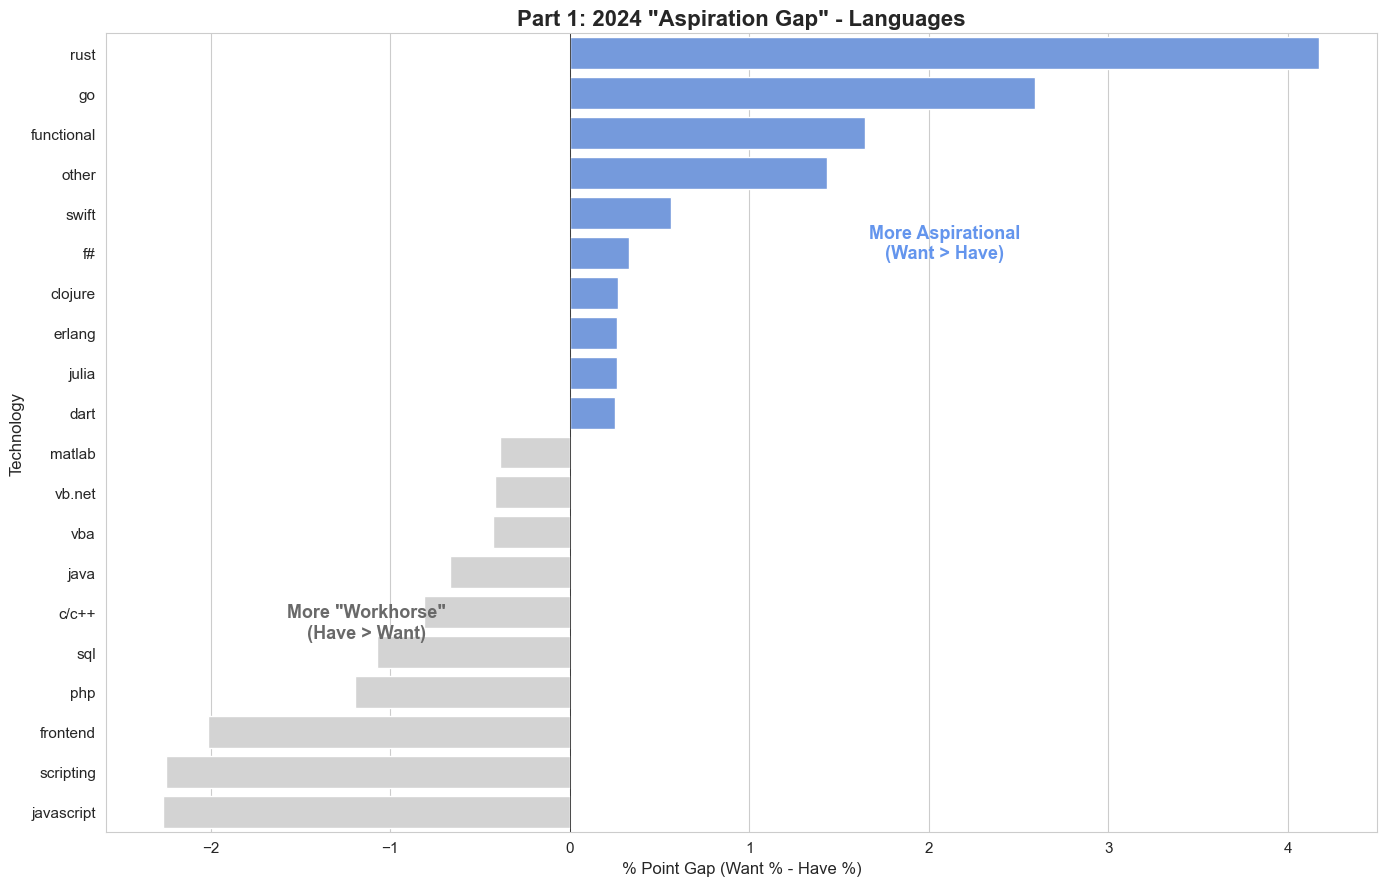

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


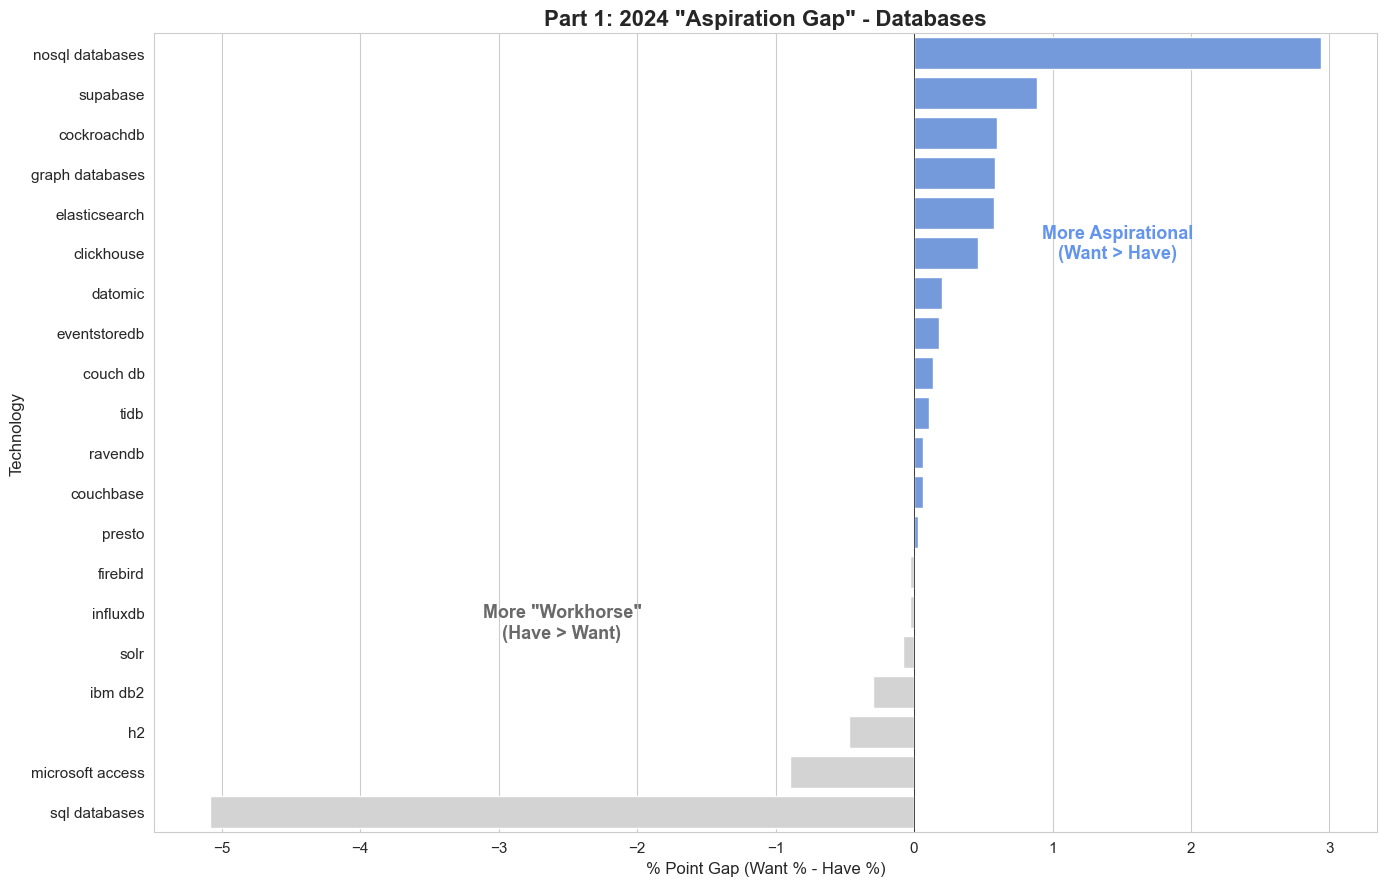

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


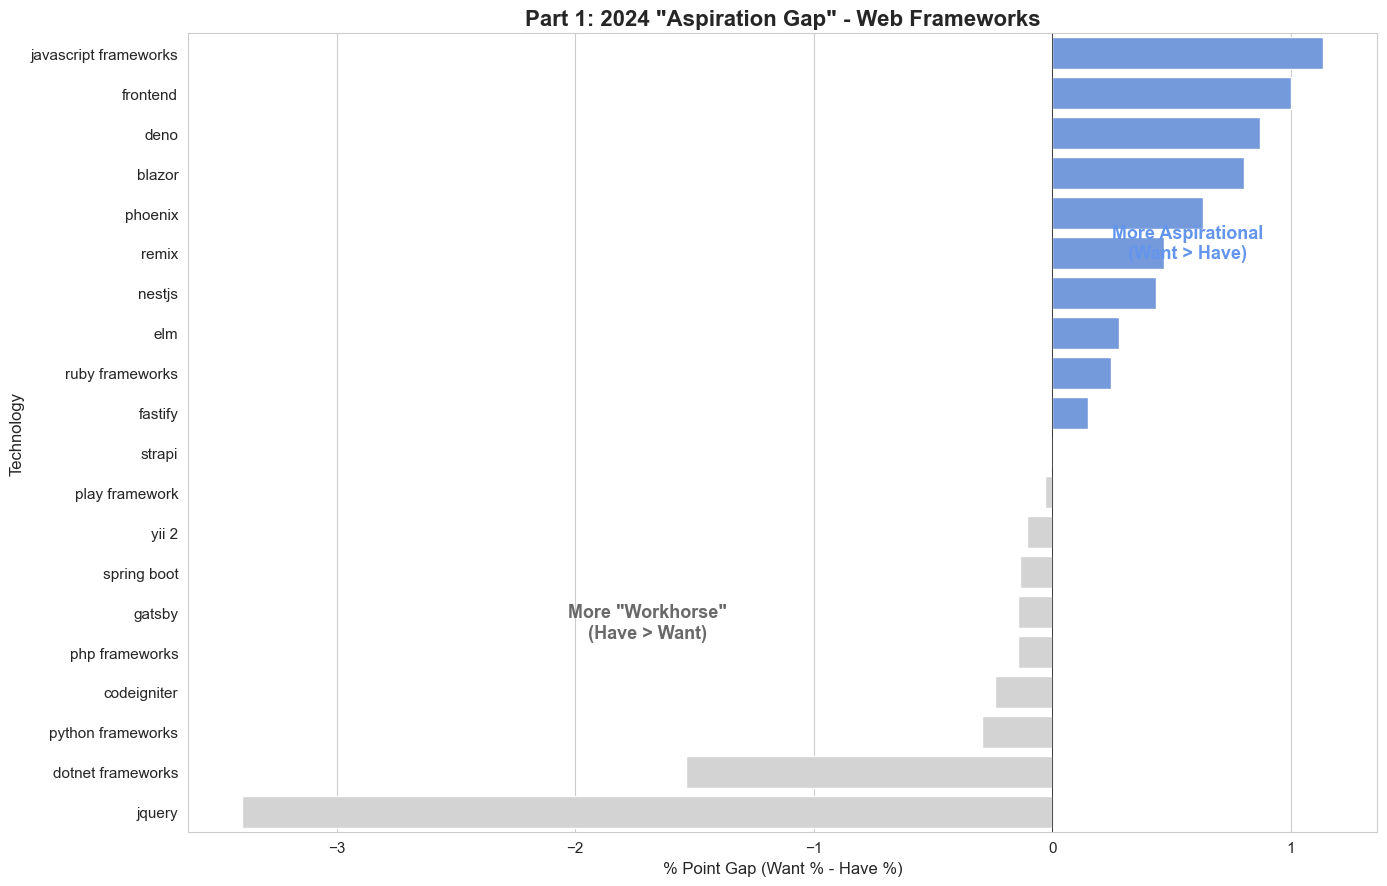


--- Running Part 2: 'Evolution of Hype' (2019 vs. 2024) ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


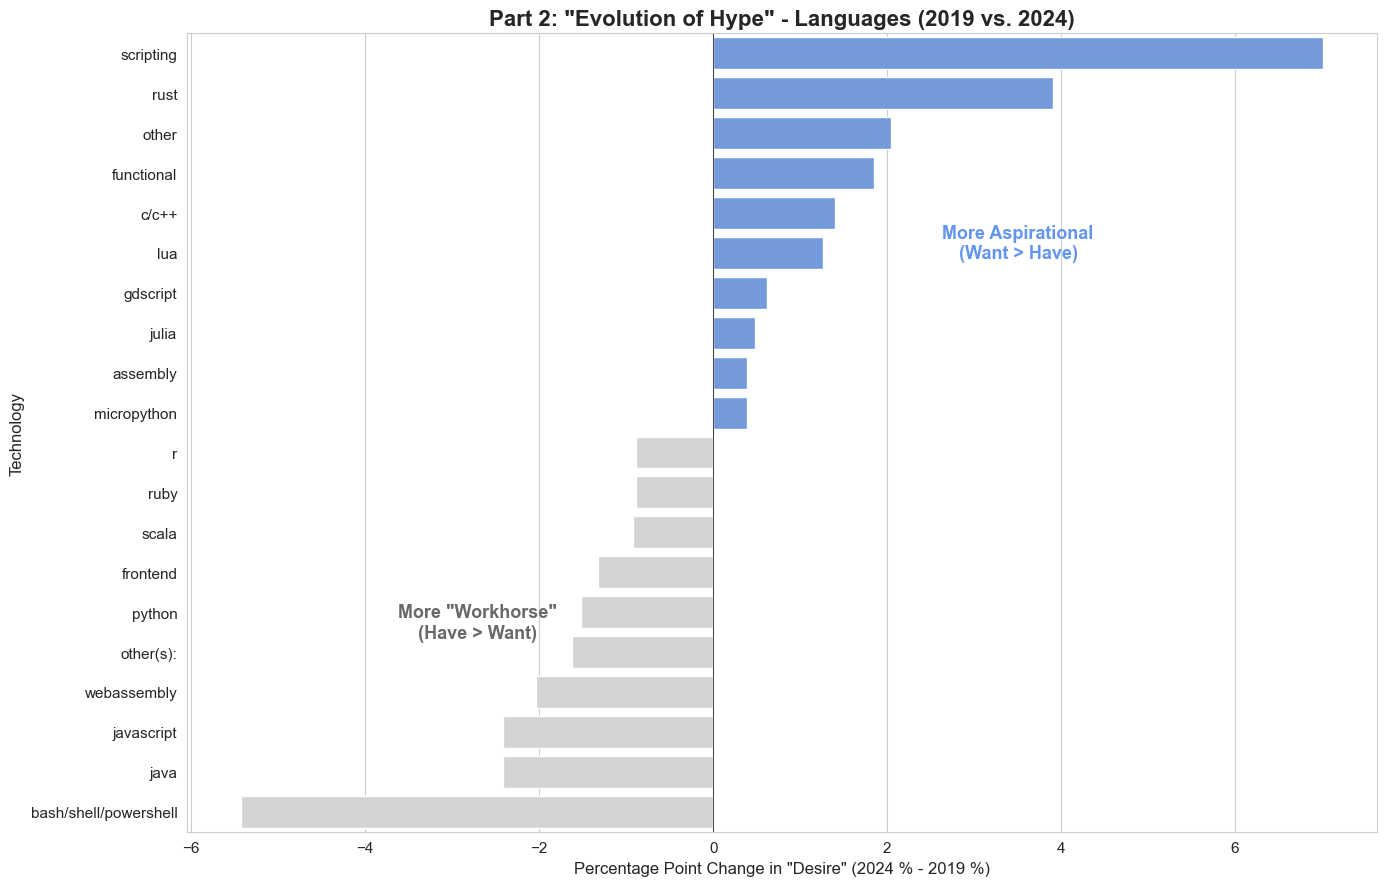

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


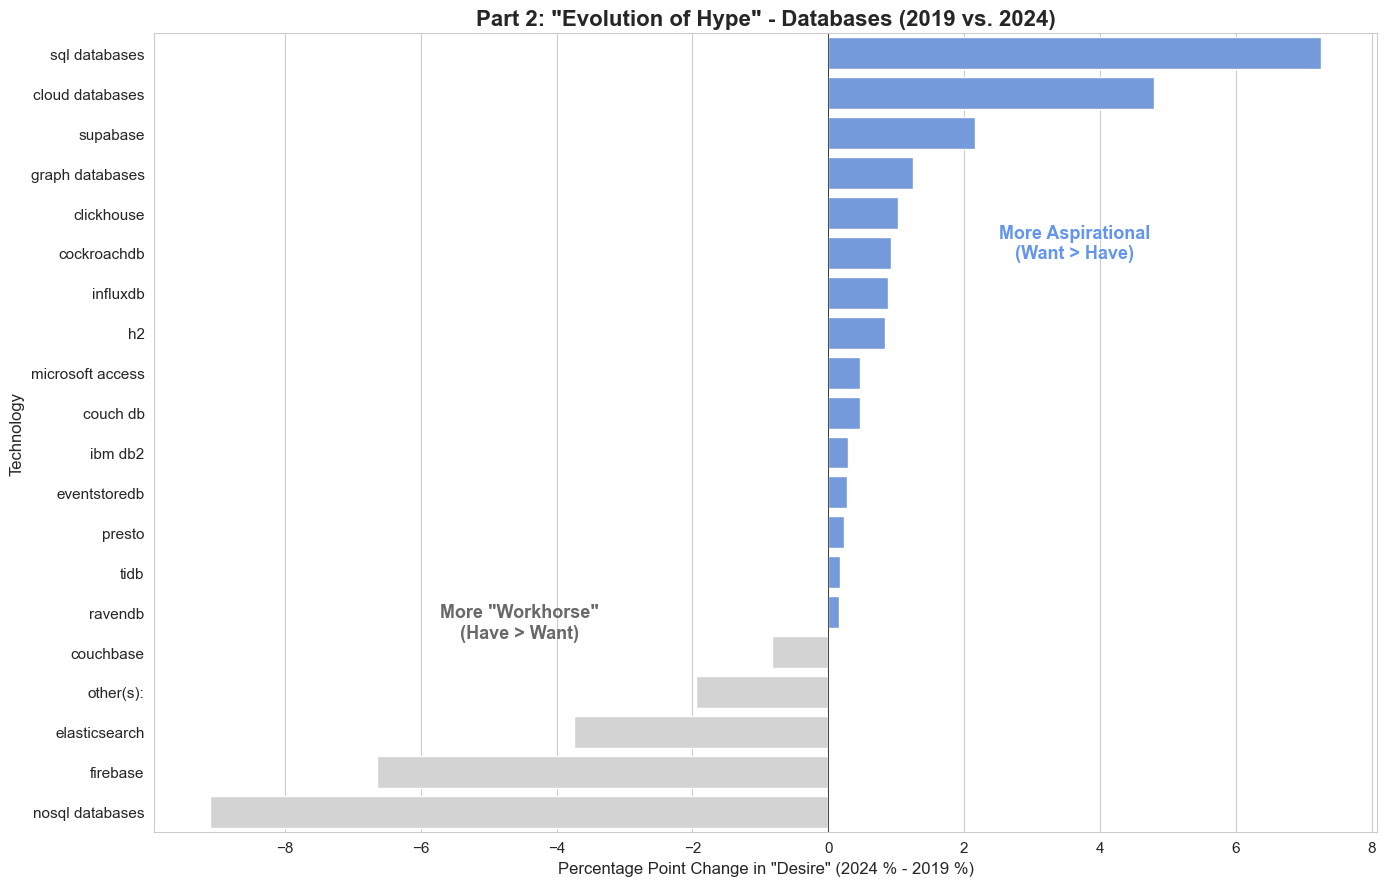

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\663579210.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gap', y=df.index, palette=palette)


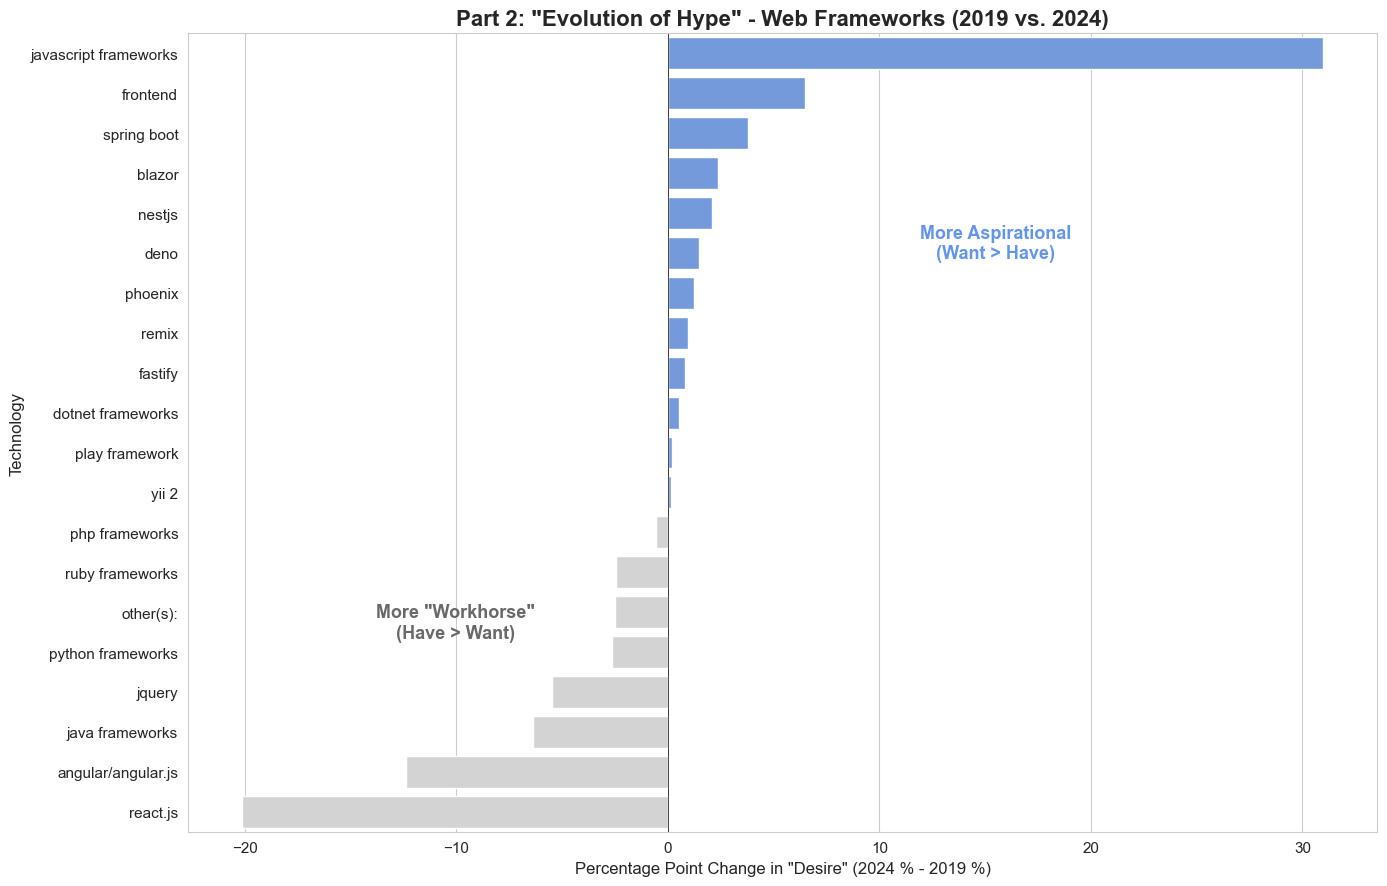

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration & Styling ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 11

# --- File Paths ---
FILE_2019 = 'major_cleaned_2019_survey.csv'
FILE_2024 = 'major_cleaned_2024_survey.csv'

# --- Main Helper Function ---

def get_skill_counts(series, delimiter=';'):
    """
    Splits a series by a delimiter, normalizes, and returns value counts.
    """
    if not isinstance(series, pd.Series):
        return pd.Series(dtype='float64').rename('Percentage')
        
    series = series.dropna().astype(str).str.lower()
    skills = series.str.split(delimiter).explode().str.strip().str.lower()

    # --- Normalization Map (must be defined before mapping) ---
    skill_normalization_map = {
        # --- Programming Languages ---
        'python': 'python',
        'r': 'r',
        'java': 'java',
        'javascript': 'javascript',
        'typescript': 'javascript',
        'c': 'c/c++',
        'c++': 'c/c++',
        'c#': 'c#',
        'go': 'go',
        'kotlin': 'java',
        'swift': 'swift',
        'ruby': 'ruby',
        'php': 'php',
        'rust': 'rust',
        'scala': 'scala',
        'matlab': 'matlab',
        'objective-c': 'objective-c',
        'vba': 'vba',
        'visual basic (.net)': 'vb.net',
        'julia': 'julia',
        'perl': 'perl',
        'dart': 'dart',
        'haskell': 'functional',
        'elixir': 'functional',
        'lisp': 'functional',
        'ocaml': 'functional',

        # --- Web / App Frameworks ---
        'react': 'javascript frameworks',
        'angular': 'javascript frameworks',
        'angularjs': 'javascript frameworks',
        'vue.js': 'javascript frameworks',
        'next.js': 'javascript frameworks',
        'nuxt.js': 'javascript frameworks',
        'svelte': 'javascript frameworks',
        'solid.js': 'javascript frameworks',
        'express': 'javascript frameworks',
        'node.js': 'javascript frameworks',
        'nest.js': 'javascript frameworks',
        'django': 'python frameworks',
        'flask': 'python frameworks',
        'fastapi': 'python frameworks',
        'spring': 'java frameworks',
        'ruby on rails': 'ruby frameworks',
        'laravel': 'php frameworks',
        'symfony': 'php frameworks',
        'asp.net': 'dotnet frameworks',
        'asp.net core': 'dotnet frameworks',

        # --- Databases ---
        'mysql': 'sql databases',
        'postgresql': 'sql databases',
        'sqlite': 'sql databases',
        'oracle': 'sql databases',
        'mariadb': 'sql databases',
        'microsoft sql server': 'sql databases',
        'snowflake': 'sql databases',
        'bigquery': 'sql databases',
        'duckdb': 'sql databases',
        'databricks sql': 'sql databases',
        'mongodb': 'nosql databases',
        'redis': 'nosql databases',
        'dynamodb': 'nosql databases',
        'cassandra': 'nosql databases',
        'neo4j': 'graph databases',
        'firebase realtime database': 'cloud databases',
        'cloud firestore': 'cloud databases',
        'cosmos db': 'cloud databases',

        # --- Scripting, Frontend, Embedded, Other ---
        'bash/shell (all shells)': 'scripting',
        'powershell': 'scripting',
        'html/css': 'frontend',
        'htmx': 'frontend',
        'astro': 'frontend',
        'wordpress': 'frontend',
        'drupal': 'frontend',
        'zephyr': 'embedded systems',
        'arduino': 'embedded systems',
        'verilog': 'embedded systems',
        'vhdl': 'embedded systems',
        'fortran': 'legacy languages',
        'cobol': 'legacy languages',
        'prolog': 'other',
        'nim': 'other',
        'zig': 'other',
        'crystal': 'other',
        'ada': 'other'
    }

    # --- Apply normalization map ---
    skills = skills.map(lambda x: skill_normalization_map.get(x, x))

    # --- Return as percentage ---
    return (skills.value_counts(normalize=True) * 100).rename('Percentage')


def plot_diverging_bar(df, title, xlabel):
    """
    Helper function to create a standardized diverging bar chart.
    """
    df = df.sort_values('Gap', ascending=False)
    
    # Create a color palette for diverging chart
    palette = ['cornflowerblue' if x > 0 else 'lightgray' for x in df['Gap']]

    # Plot
    plt.figure(figsize=(14, 9))
    sns.barplot(data=df, x='Gap', y=df.index, palette=palette)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Technology', fontsize=12)
    
    # Add labels
    plt.axvline(0, color='black', lw=0.5)
    
    # Find positions for labels
    mid_point = (len(df) - 1) / 2
    top_label_y = mid_point * 0.5  # Position in the top half
    bottom_label_y = mid_point + (mid_point * 0.5) # Position in the bottom half
    
    if (df['Gap'] > 0).any():
        plt.text(df['Gap'].max() * 0.5, top_label_y, 'More Aspirational\n(Want > Have)', 
                 ha='center', va='center', fontsize=13, color='cornflowerblue', weight='bold')
    if (df['Gap'] < 0).any():
        plt.text(df['Gap'].min() * 0.5, bottom_label_y, 'More "Workhorse"\n(Have > Want)', 
                 ha='center', va='center', fontsize=13, color='dimgray', weight='bold')
    
    plt.tight_layout()
    plt.show()

# --- Part 1: The 2024 "Aspiration Gap" ---

def analyze_2024_gap(df_2024):
    """
    Analyzes and plots the "Aspiration Gap" for Languages, Databases,
    and Web Frameworks from the 2024 data.
    """
    print("\n--- Running Part 1: 2024 'Aspiration Gap' Analysis ---")
    
    # Define column pairs
    categories = {
        'Language': ('LanguageHaveWorkedWith', 'LanguageWantToWorkWith'),
        'Database': ('DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith'),
        'Web Framework': ('WebframeHaveWorkedWith', 'WebframeWantToWorkWith')
    }
    
    for tech_type, (have_col, want_col) in categories.items():
        # Get skill counts
        have_pct = get_skill_counts(df_2024[have_col], delimiter=';')
        want_pct = get_skill_counts(df_2024[want_col], delimiter=';')
        
        # Combine into a single DataFrame
        gap_df = pd.DataFrame({'Have': have_pct, 'Want': want_pct}).fillna(0)
        
        # Calculate the "Aspiration Gap" (Want - Have)
        gap_df['Gap'] = gap_df['Want'] - gap_df['Have']
        
        # Filter for top/bottom 10
        top_aspirational = gap_df.nlargest(10, 'Gap')
        top_workhorse = gap_df.nsmallest(10, 'Gap')
        
        # Combine for plotting
        plot_df = pd.concat([top_aspirational, top_workhorse])
        # Drop any zeros that might have crept in if < 20 skills
        plot_df = plot_df[plot_df['Gap'] != 0]
        
        # Plot
        plot_diverging_bar(
            plot_df,
            f'Part 1: 2024 "Aspiration Gap" - {tech_type}s',
            '% Point Gap (Want % - Have %)'
        )
def debug_normalized_counts(df_2024):
    cols = [
        'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
        'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
        'WebframeHaveWorkedWith', 'WebframeWantToWorkWith'
    ]

    print("\n--- Normalized skill frequencies (top 20) ---")
    for c in cols:
        counts = get_skill_counts(df_2024[c], delimiter=';')
        print(f"\n[{c}]")
        print(counts.head(20))

debug_normalized_counts(df_2024)

# --- Part 2: The "Evolution of Hype" (2019 vs. 2024) ---

def analyze_hype_evolution(df_2019, df_2024):
    """
    Analyzes and plots the change in "Desire" for Languages, Databases,
    and Web Frameworks from 2019 to 2024.
    """
    print("\n--- Running Part 2: 'Evolution of Hype' (2019 vs. 2024) ---")
    
    # Define column pairs for 2019 (Desire) and 2024 (Want)
    categories = {
        'Language': ('LanguageDesireNextYear', 'LanguageWantToWorkWith'),
        'Database': ('DatabaseDesireNextYear', 'DatabaseWantToWorkWith'),
        'Web Framework': ('WebFrameDesireNextYear', 'WebframeWantToWorkWith')
    }
    
    for tech_type, (col_2019, col_2024) in categories.items():
        # Get skill counts
        desire_2019 = get_skill_counts(df_2019[col_2019], delimiter=';')
        desire_2024 = get_skill_counts(df_2024[col_2024], delimiter=';')
        
        # Combine into a single DataFrame
        desire_df = pd.DataFrame({'2019': desire_2019, '2024': desire_2024}).fillna(0)
        
        # Calculate the "Hype Change"
        desire_df['Gap'] = desire_df['2024'] - desire_df['2019']
        
        # Filter for top/bottom 10
        top_grew = desire_df.nlargest(10, 'Gap')
        top_faded = desire_df.nsmallest(10, 'Gap')
        
        # Combine for plotting
        plot_df = pd.concat([top_grew, top_faded])
        plot_df = plot_df[plot_df['Gap'] != 0]

        # Plot
        plot_diverging_bar(
            plot_df,
            f'Part 2: "Evolution of Hype" - {tech_type}s (2019 vs. 2024)',
            'Percentage Point Change in "Desire" (2024 % - 2019 %)'
        )

# --- Main Execution ---
def main():
    try:
        df_2019 = pd.read_csv(FILE_2019)
        df_2024 = pd.read_csv(FILE_2024)
        print("Files loaded successfully.")
    except FileNotFoundError:
        print(f"Error: Make sure {FILE_2019} and {FILE_2024} are in the same directory.")
        return

    # Run Part 1
    analyze_2024_gap(df_2024)
    
    # Run Part 2
    analyze_hype_evolution(df_2019, df_2024)

if __name__ == "__main__":
    main()

In [27]:
def inspect_raw_skill_counts(df_2024):
    cols = [
        'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
        'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
        'WebframeHaveWorkedWith', 'WebframeWantToWorkWith'
    ]

    print("\n--- Unique skill samples (first 50 entries per column) ---")
    for c in cols:
        if c in df_2024.columns:
            raw = (
                df_2024[c]
                .dropna()
                .astype(str)
                .str.lower()
                .str.split(';')
                .explode()
                .str.strip()
                .value_counts()
            )
            print(f"\n[{c}] — {len(raw)} unique entries")
            print(raw.head(50))

inspect_raw_skill_counts(df_2024)



--- Unique skill samples (first 50 entries per column) ---

[LanguageHaveWorkedWith] — 49 unique entries
LanguageHaveWorkedWith
javascript                 31506
html/css                   26835
python                     26391
sql                        26083
typescript                 19581
bash/shell (all shells)    18095
java                       15342
c#                         13926
c++                        11868
c                          10469
php                         8905
powershell                  7291
go                          6991
rust                        6732
kotlin                      4774
lua                         3258
dart                        2787
assembly                    2779
ruby                        2733
swift                       2389
r                           2163
visual basic (.net)         2054
matlab                      2014
vba                         1870
groovy                      1730
perl                        1321
scala        